# Practice on Descriptive, Exploratory Data Analysis and Inferential Analysis using Titanic and Flights datasets of seaborn Python Library

This JN demonstrates how to:

* Perform correlation analysis using a heatmap.
* Conduct a Chi-Square test for hypothesis testing.
* Perform logistic regression analysis.
* Perform time-series forecasting using the ARIMA model on a different dataset.

###1. Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# Loading the Titanic dataset
df = sns.load_dataset('titanic')

# Displayng  the first few rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Wrangling

##Understanding the Data
### Checking the dimension of the dataset

In [ ]:
df.shape

(891, 15)

###2. Data Cleaning

In [ ]:
# Displaying and understanding the Summary statistics for both Numeric and Non Numeric variables
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking number of columns,its Data types and presence of null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### found missing or null values in the 4 columns - sec, adult_male,  ddeck, embark_town

### Finding the Total number of Null values exisiting in each columns

In [ ]:
# Checking for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
#2 commands for cleaning
# Deletes all rows having any null values
df_cleaned = df.dropna()
# drop columns with all NaN's # df_cleaned2 = df_t.dropna(axis=1, how='all')
# Drop columns with any missing values
df_cleaned_col = df.dropna(axis=1)


In [ ]:
print("Shape of Cleaned data dropping the rows  having any null value", df_cleaned.shape)

print("Shape of Cleaned data dropping the columns having any null value", df_cleaned_col.shape)

Shape of Cleaned data dropping the rows  having any null value (182, 15)
Shape of Cleaned data dropping the columns having any null value (891, 11)


In [ ]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [ ]:
df_cleaned_col.head()
# 4 columns having NULL values are removed from the dataset

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


###3. Summary statistics
Summary statistics of both numeric and non numeric fields.


In [ ]:
# Summary statistics for both Numeric and Non Numeric variables. Including the unique, top and frequency
df_cleaned.describe(include='all')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,182.000000,182.000000,182,182.000000,182.000000,182.000000,182.000000,182,182,182,182,182,182,182,182
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,First,man,False,C,Southampton,yes,False
freq,NaN,NaN,94,NaN,NaN,NaN,NaN,115,157,87,95,51,115,123,104
mean,0.675824,1.192308,NaN,35.623187,0.467033,0.478022,78.919735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.469357,0.516411,NaN,15.671615,0.645007,0.755869,76.490774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.920000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,24.000000,0.000000,0.000000,29.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,NaN,36.000000,0.000000,0.000000,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,NaN,47.750000,1.000000,1.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Encoding (converting) the SEX column from Category to numeric


In [ ]:
df_cleaned['sex'] = df_cleaned['sex'].replace({'male':0,'female':1})

<ipython-input-12-459cdc65acd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'] = df_cleaned['sex'].replace({'male':0,'female':1})


###4.  Data Visualization
###Histogram for Age Distribution

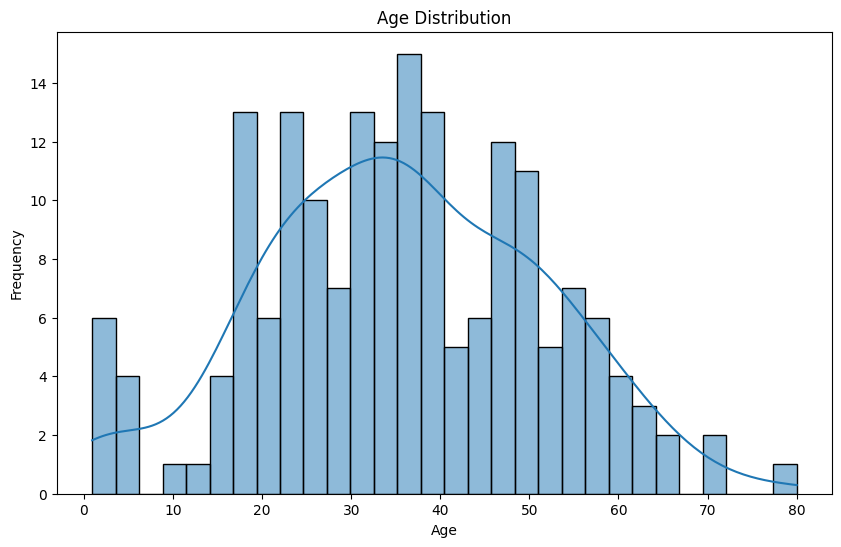

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


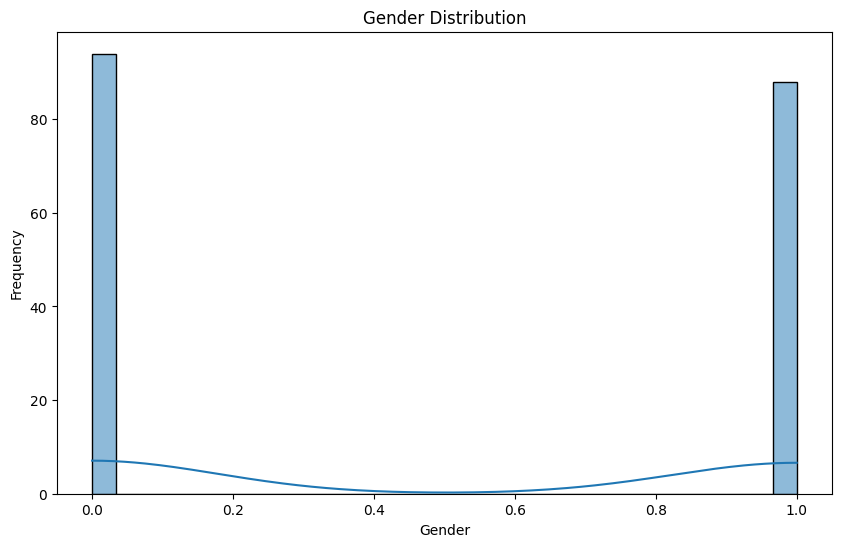

In [ ]:
# Histogram for Gender distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sex'], bins=30, kde=True)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


### Bar Plot for Survived Counts

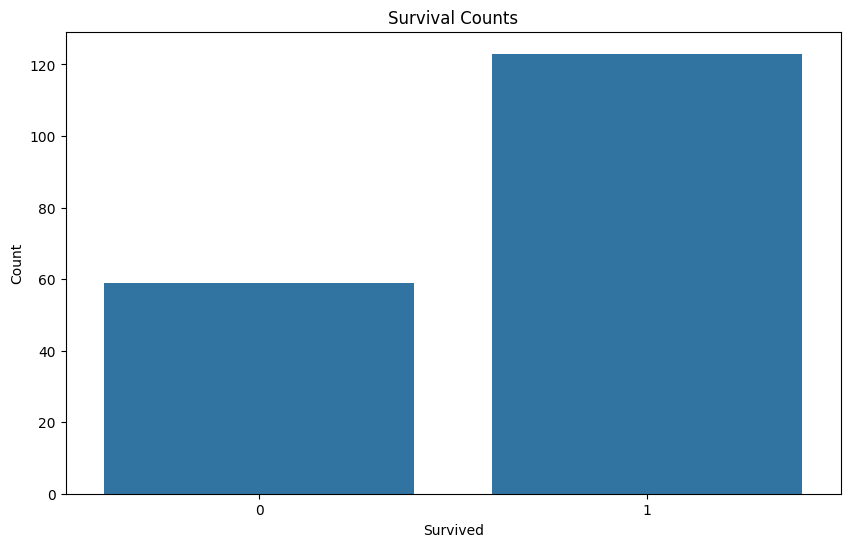

In [ ]:
# Bar plot for survived counts
import seaborn as sb
plt.figure(figsize=(10, 6))
sb.countplot(x='survived', data=df_cleaned)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


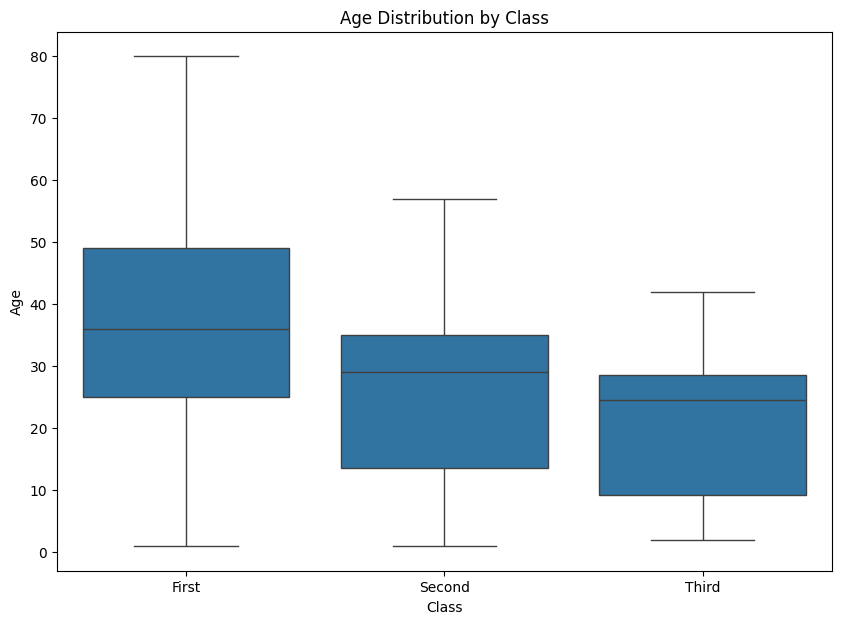

In [ ]:
# Bar plot for Distribution of Class by Age
import seaborn as sb
plt.figure(figsize=(10,7))
sns.boxplot(x='class', y='age',data=df_cleaned)
plt.title('Age Distribution by Class')
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

### Collecting Numeric Data Types and Non Numeric Separately

In [ ]:
# Separating  numeric and non-numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
non_numeric_df = df_cleaned.select_dtypes(exclude=['float64', 'int64'])
#non_ndf = df_cleaned.select_dtypes(exclude=['float64','int64'])

## Generating  the correlation matrix for numeric data

In [ ]:
# Generating  the correlation matrix for numeric data
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

          survived    pclass       sex       age     sibsp     parch      fare
survived  1.000000 -0.037698  0.529176 -0.251045  0.101376  0.018739  0.130632
pclass   -0.037698  1.000000  0.044342 -0.305708 -0.105262  0.046273 -0.316796
sex       0.529176  0.044342  1.000000 -0.182452  0.100869  0.086556  0.127872
age      -0.251045 -0.305708 -0.182452  1.000000 -0.154160 -0.269757 -0.090730
sibsp     0.101376 -0.105262  0.100869 -0.154160  1.000000  0.253478  0.284841
parch     0.018739  0.046273  0.086556 -0.269757  0.253478  1.000000  0.388540
fare      0.130632 -0.316796  0.127872 -0.090730  0.284841  0.388540  1.000000


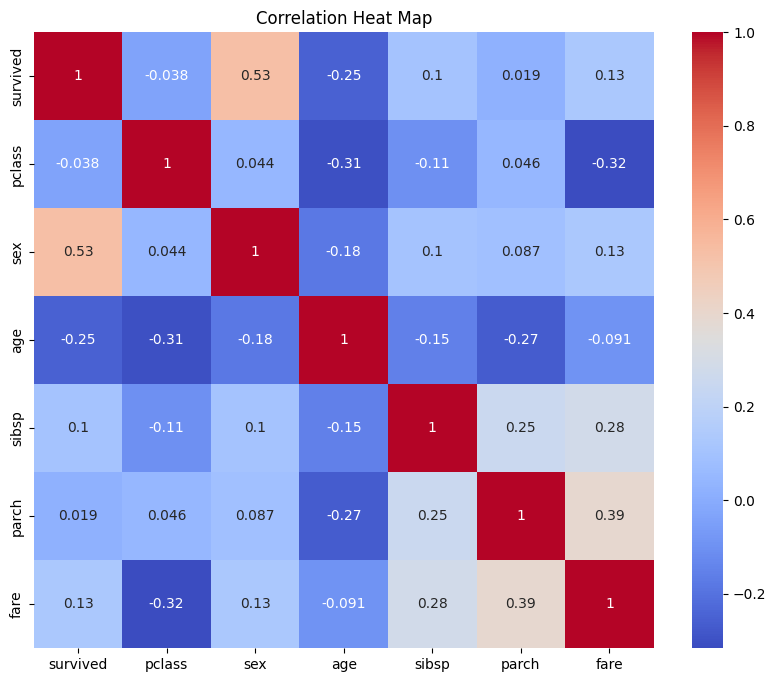

In [ ]:
# Heatmap visualization for Correlation
import seaborn as sb
plt.figure(figsize=(10,8))

# Selecting only numeric columns for the correlation matrix
# numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heat Map")
plt.show()



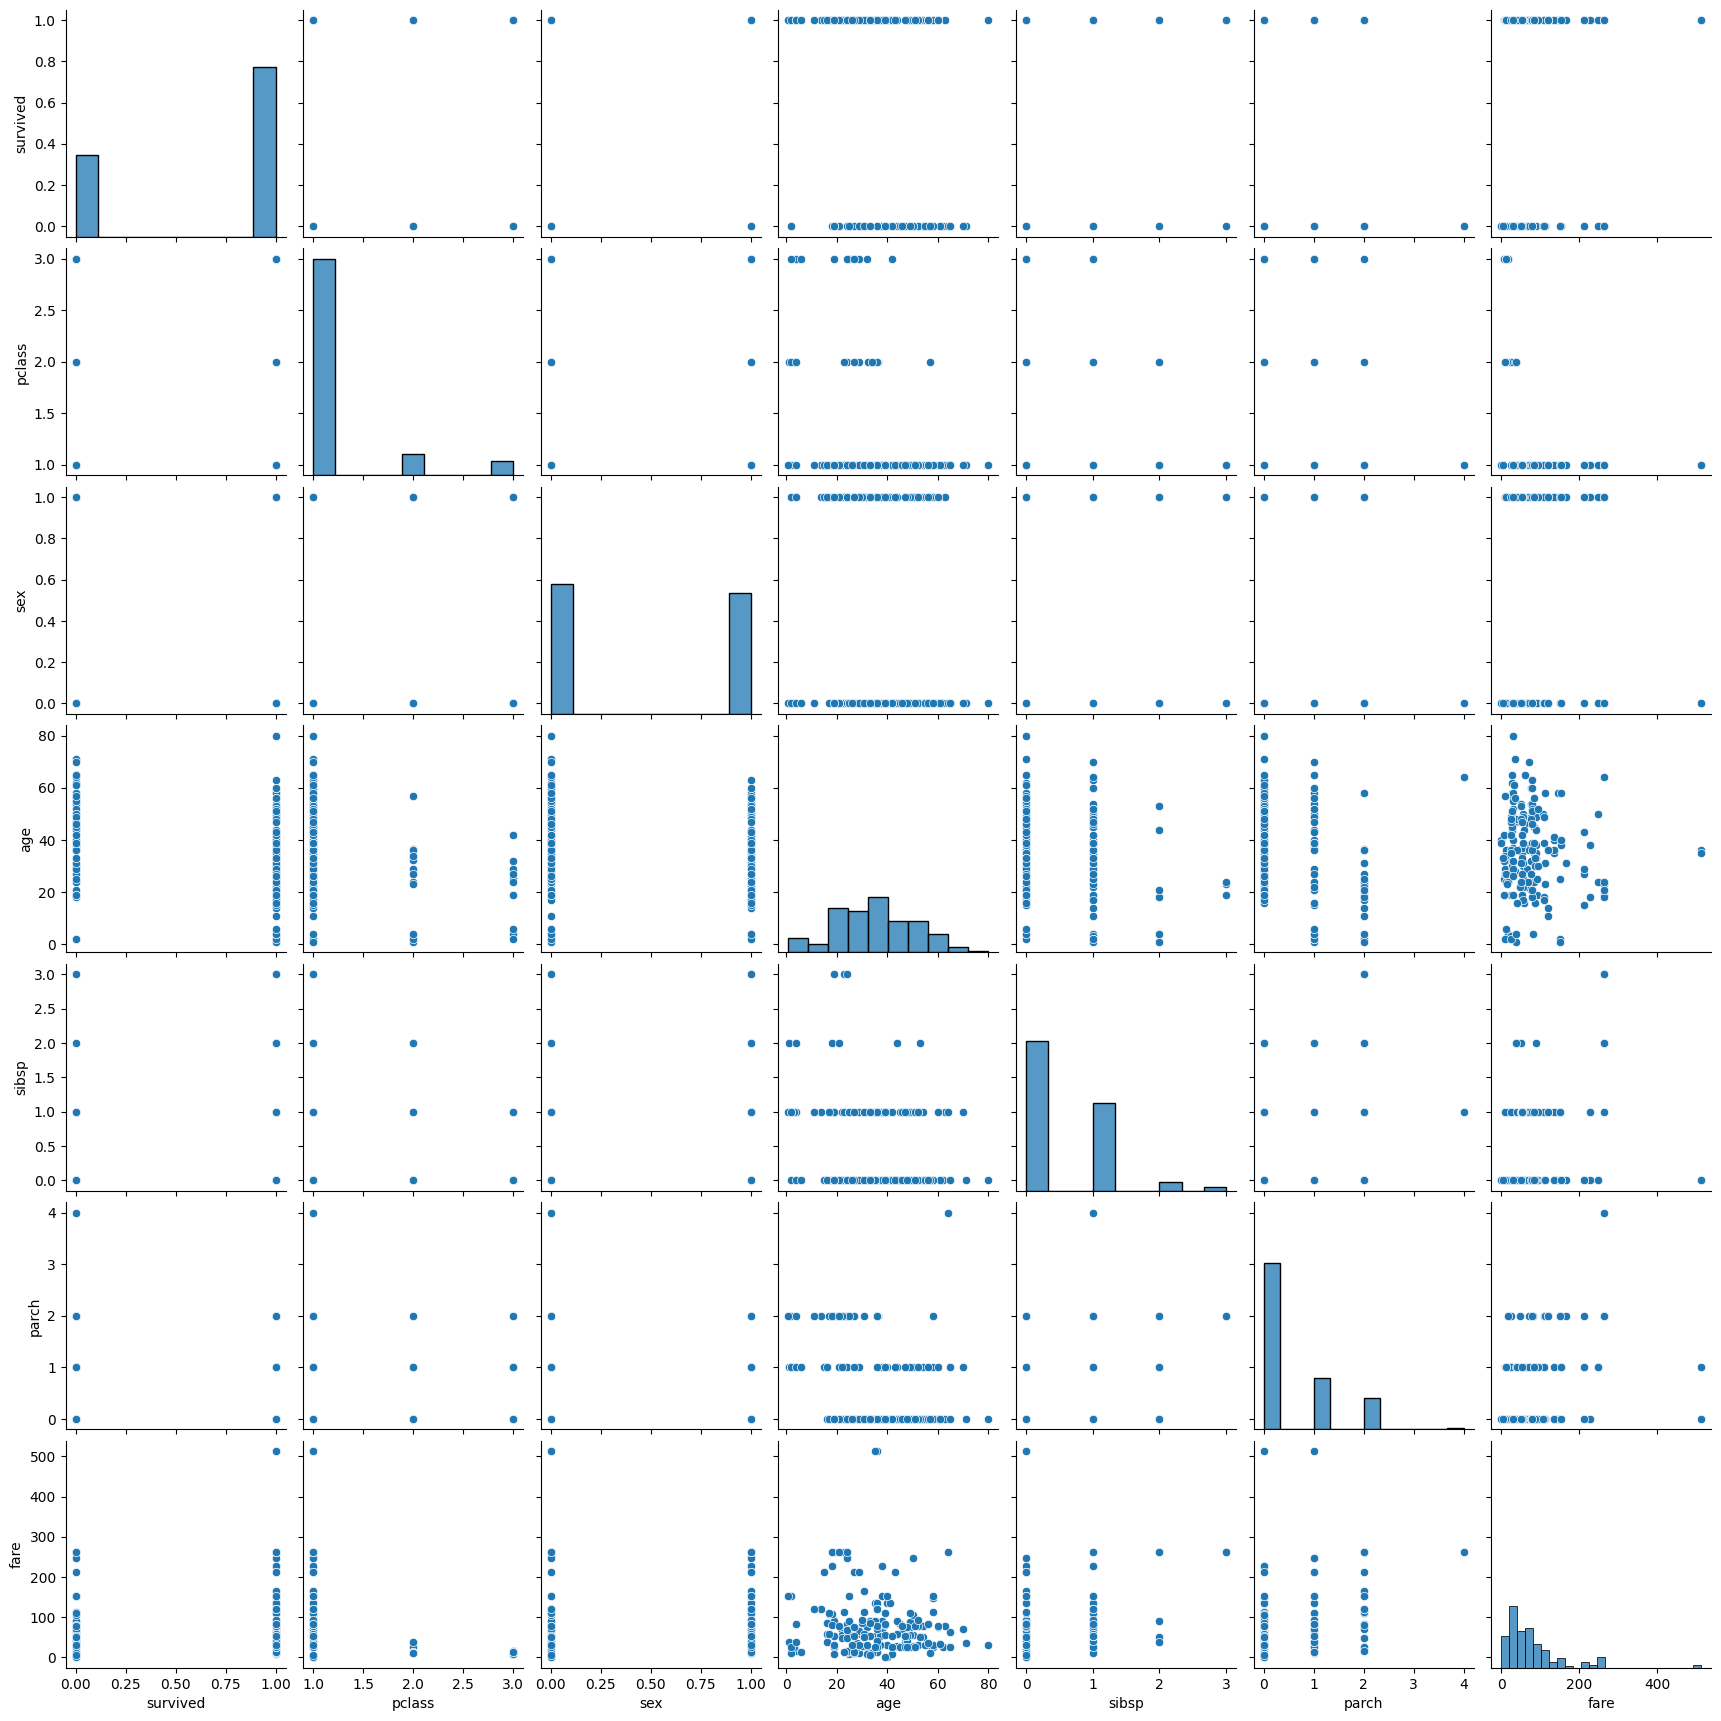

In [ ]:
# Pairplot visualization for numerical variables
sb.pairplot(numeric_df)
plt.show()

In [ ]:
# # Generating  the correlation matrix for numeric data
# correlation_matrix = numeric_df.corr()

 ## Correlation Analysis on "survived"

In [ ]:
# Correlation Analysis on "survived" column of Titanic dataset
print(correlation_matrix['survived'].sort_values(ascending=False))

survived    1.000000
sex         0.529176
fare        0.130632
sibsp       0.101376
parch       0.018739
pclass     -0.037698
age        -0.251045
Name: survived, dtype: float64


Inferential statistical analysis involves drawing conclusions about a population based on sample data. Here, we will demonstrate correlation analysis, hypothesis testing, regression analysis, and (although the Titanic dataset doesn't have time-series data) an example of time-series forecasting.
Step-by-Step Guide

* Correlation Analysis
* Hypothesis Testing
* Regression Analysis
* Time-Series Forecasting (with a different dataset)

#1. Correlation Analysis

Let's start with correlation analysis to understand the relationships between numerical variables.

<ipython-input-23-4ca8d8040539>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'] = df_cleaned['sex'].replace({'male': 0, 'female': 1})


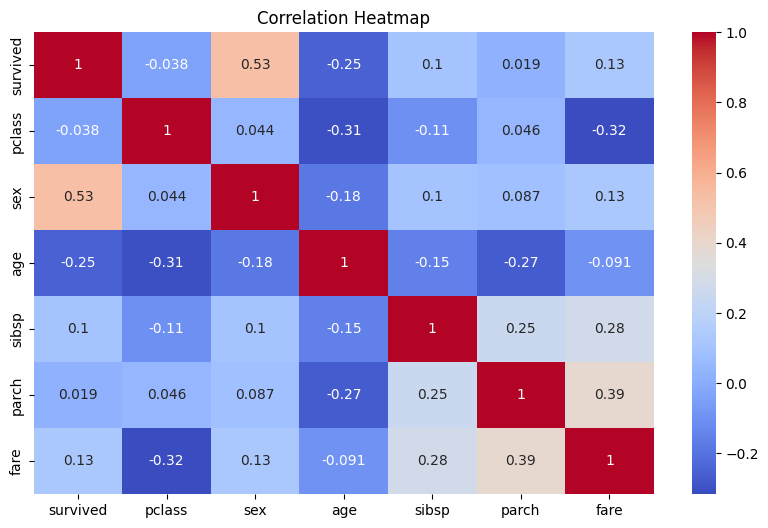

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
df_cleaned = df.dropna()

# Replace 'male' with 0 and 'female' with 1 in the 'sex' column
df_cleaned['sex'] = df_cleaned['sex'].replace({'male': 0, 'female': 1})

# Select only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#2. Hypothesis Testing

Let's perform a hypothesis test to check if the survival rate differs by gender.

A frequency table is a table that shows the distribution of values in a dataset by counting the number of occurrences of each value. In Pandas, the crosstab() function provides a simple and flexible way to compute frequency tables of two or more variables.

In [ ]:
from  scipy.stats import chi2_contingency
# Crosstab() function computes the frequency distribution table between two variables of a pandas dataframe
contingency_table1 = pd.crosstab(df_cleaned['sex'], df_cleaned['survived'])
contingency_table1

survived,0,1
sex,,
0,53,41
1,6,82


In [ ]:
Chi2_test_result, p_value, degree_o_freedom, expected = chi2_contingency(contingency_table1)
print("Chi-Square Test")
print("Chi2 test result: ", Chi2_test_result)
print("p_value result: ", p_value)
print("degree_o_freedom result: ", degree_o_freedom)
print("expected value: ", expected)

# Interpretation
p_value_thresshold = 0.05
if p_value < p_value_thresshold :
  print("Reject the null hypothesis - There is a significant association between gender and survival.")
else:
  print("Accept the null hypothesis - There is No significant association between gender and survival.")

Chi-Square Test
Chi2 test result:  48.727693151066845
p_value result:  2.9408443932963227e-12
degree_o_freedom result:  1
expected value:  [[30.47252747 63.52747253]
 [28.52747253 59.47252747]]
Reject the null hypothesis - There is a significant association between gender and survival.


#3. Regression Analysis

Let's perform logistic regression to predict the likelihood of survival based on gender and age.

In [ ]:
import statsmodels.api as sm

# Preparing the data
X = df_cleaned[['sex', 'age']]
y = df_cleaned['survived']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.458018
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  182
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                  0.2730
Time:                        00:20:19   Log-Likelihood:                -83.359
converged:                       True   LL-Null:                       -114.66
Covariance Type:            nonrobust   LLR p-value:                 2.559e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8489      0.514      1.652      0.098      -0.158       1.856
sex            2.7914      0.

In [ ]:
# Predicting the survival probability
df_cleaned['predicted_survival'] = model.predict(X)

# Display the first few rows with predictions
print(df_cleaned.head())

    survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
1          1       1    1  38.0      1      0  71.2833        C  First  woman   
3          1       1    1  35.0      1      0  53.1000        S  First  woman   
6          0       1    0  54.0      0      0  51.8625        S  First    man   
10         1       3    1   4.0      1      1  16.7000        S  Third  child   
11         1       1    1  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  predicted_survival  
1        False    C    Cherbourg   yes  False            0.926439  
3        False    C  Southampton   yes  False            0.932177  
6         True    E  Southampton    no   True            0.326456  
10       False    G  Southampton   yes  False            0.971355  
11       False    C  Southampton   yes   True            0.875511  


<ipython-input-27-c22529da2352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['predicted_survival'] = model.predict(X)


#4. Time-Series Forecasting

Since the Titanic dataset doesn't contain time-series data, we will use a different dataset. Let's use the seaborn flights dataset for demonstration


In [ ]:
# Time-Series Forecasting (using the flights dataset)
# Load the flights dataset
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# month = ("Jan", "Feb", "Mar",  "Apr",  "May",  "Jun",  "Jul",  "Aug",  "Sep",  "Oct",  "Nov",  "Dec")
# month_to_num  = enumerate(month,1)  # 'enumerate' object is not callable. Hence change to dictionary
# month_to_num = {name: num for num, name in enumerate(month, 1)}
#flights['month'] = flights['month'].map(month_to_num)
## Define the months and create the month to number mapping
month_to_num = {"Jan": 1,  "Feb": 2, "Mar": 3,  "Apr": 4,  "May": 5,  "Jun": 6,  "Jul": 7,  "Aug": 8,  "Sep": 9,  "Oct": 10,  "Nov": 11,  "Dec": 12 }
flights['month'] = flights['month'].map(month_to_num)

flights.head()

,year,month,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


In [ ]:
month_to_num

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}


# Creating a 'date' column from 'year' and 'month' and Index the Data frame by Date Column

In [ ]:
# Creating a 'date' column from 'year' and 'month'
flights['date'] = pd.to_datetime(flights.assign(day=1).loc[:, ['year', 'month', 'day']])
# Set the 'date' column as the index
flights.set_index('date', inplace=True)
flights.head()

,year,month,passengers
date,,,
1949-01-01,1949,1,112
1949-02-01,1949,2,118
1949-03-01,1949,3,132
1949-04-01,1949,4,129
1949-05-01,1949,5,121


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


# Ploting the time series

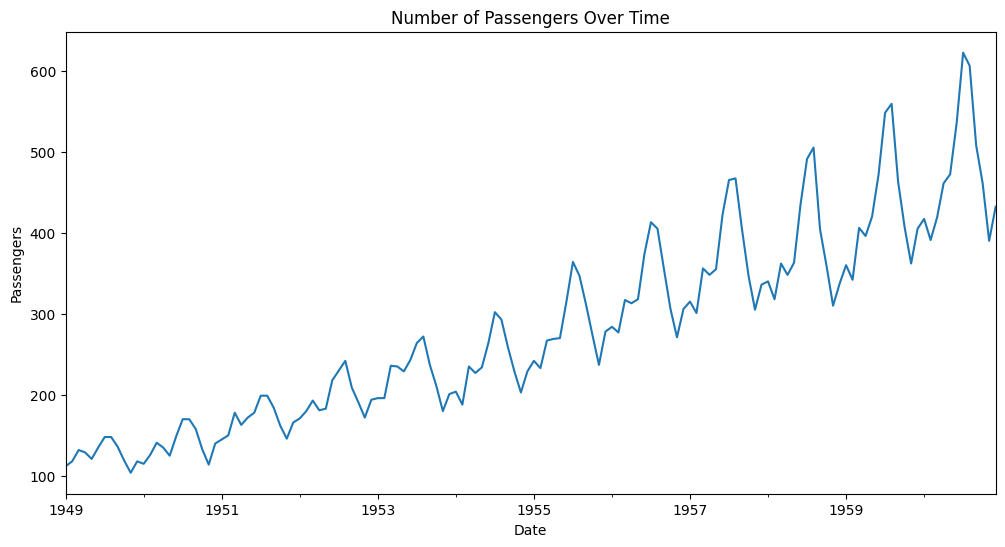

In [ ]:
# Ploting the time series
flights['passengers'].plot(figsize=(12, 6))
plt.title('Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Performing time-series forecasting using ARIMA model

In [ ]:
# Performing time-series forecasting using ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(flights['passengers'], order=(1, 1, 1))
fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#Model summary

In [ ]:
# Printing the model summary
print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 03 Jun 2024   AIC                           1394.683
Time:                        00:20:20   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

# Forecasting the next 12 months

In [ ]:
# Forecasting the next 12 months
forecast = fit.forecast(steps=12)
print(forecast)


1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


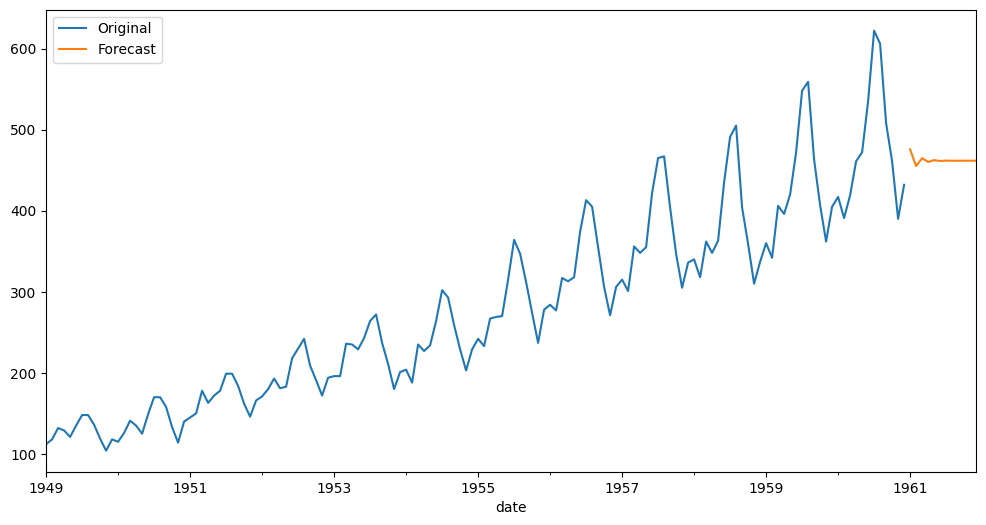

In [ ]:
# Ploting the forecast
flights['passengers'].plot(figsize=(12, 6), label='Original')
forecast.plot(label='Forecast')
plt.legend()
plt.show()


Summary

This guide demonstrates how to:

* Perform correlation analysis using a heatmap.
* Conduct a Chi-Square test for hypothesis testing.
* Perform logistic regression analysis.
* Perform time-series forecasting using the ARIMA model on a different dataset.